<a href="https://colab.research.google.com/github/Guhan2348519/dl-lab-tasks/blob/main/2348519_DL_labtest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from PIL import Image, ImageFilter


performing augmentation like flipping,rescaling,rotation and many more to preprocess and augment data(prevent underfitting)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator (
    rescale = 1./255,
    rotation_range=43,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode='nearest'
)
train_generator = train_datagen.flow_from_directory(
    'train',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)



Found 2301 images belonging to 10 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'test',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

Found 1025 images belonging to 10 classes.


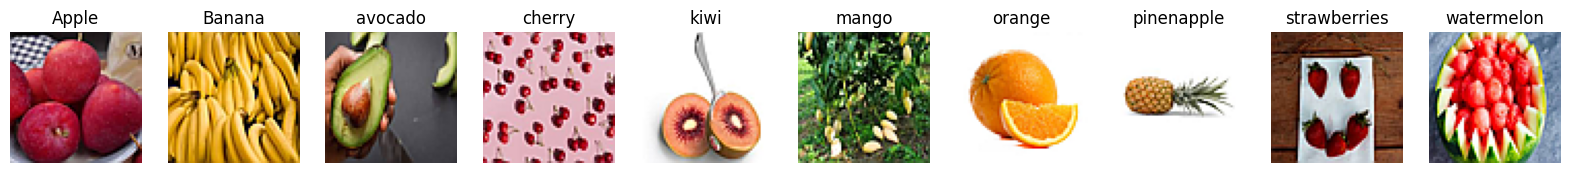

In [ ]:
training_dir = 'train'
testing_dir = 'test'
class_labels = list(train_generator.class_indices.keys())
def display(directory, class_labels, target_size=(128,128)):
    fig, axes = plt.subplots(1, len(class_labels), figsize=(20, 20))

    for i, label in enumerate(class_labels):
        class_path = os.path.join(directory, label)
        images = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
        img_path = os.path.join(class_path, images[0])

        img = Image.open(img_path)
        img = img.resize(target_size)
        img = img.filter(ImageFilter.SHARPEN)

        axes[i].imshow(img)
        axes[i].set_title(label)
        axes[i].axis('off')

    plt.show()
display(testing_dir, class_labels)


CONSTRUCTING CUSTOM CNN FOR THE DATA

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128,128, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),

    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
opt=Adam(learning_rate=0.0001)

C:\Users\Guhan\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])



In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)


Epoch 1/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 66s 864ms/step - accuracy: 0.2433 - loss: 3.5226 - val_accuracy: 0.1024 - val_loss: 3.9826
Epoch 2/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 60s 815ms/step - accuracy: 0.3781 - loss: 1.8598 - val_accuracy: 0.1044 - val_loss: 4.7315
Epoch 3/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 60s 810ms/step - accuracy: 0.4187 - loss: 1.6719 - val_accuracy: 0.1337 - val_loss: 5.4272
Epoch 4/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 63s 859ms/step - accuracy: 0.4240 - loss: 1.6421 - val_accuracy: 0.2166 - val_loss: 3.3962
Epoch 5/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 62s 839ms/step - accuracy: 0.4711 - loss: 1.5589 - val_accuracy: 0.3132 - val_loss: 2.5838
Epoch 6/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 61s 832ms/step - accuracy: 0.4942 - loss: 1.4399 - val_accuracy: 0.4068 - val_loss: 1.9969
Epoch 7/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 62s 843ms/step - accuracy: 0.4840 - loss: 1.4851 - val_accuracy: 0.4566 - val_loss: 1.7725
Epoch 8/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 61s 838ms/step - accuracy: 0.5050 - loss: 1.4110 - val_accu

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test accuracy:", test_accuracy)
print("Test loss:", test_loss)


33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - accuracy: 0.4575 - loss: 1.6691
Test accuracy: 0.45073169469833374
Test loss: 1.8148587942123413


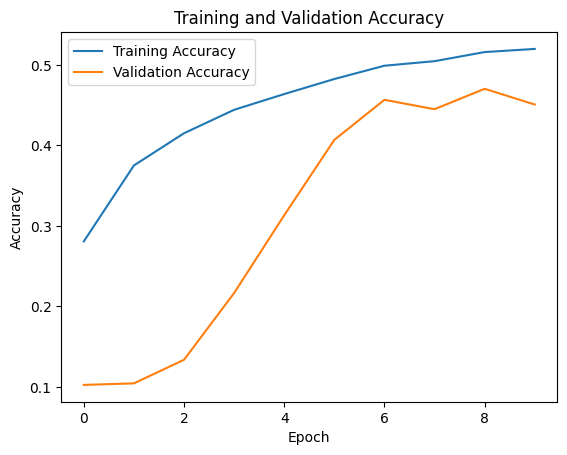

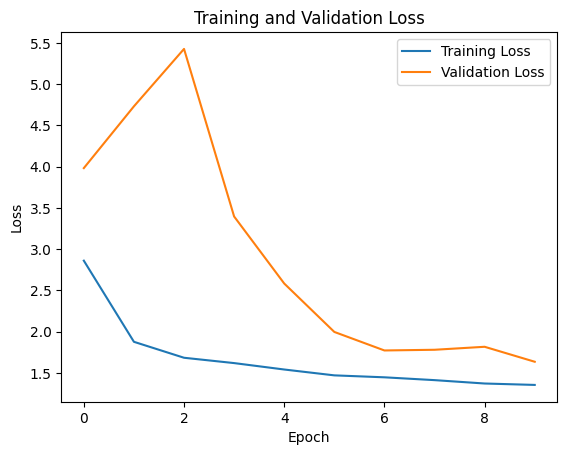

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [ ]:
img = cv2.imread('predict/33.jpeg')
cv2.imshow('Image', img)

In [ ]:
import cv2
import numpy as np
img = cv2.imread('predict/33.jpeg')
img = cv2.resize(img, (128,128))
cv2.imshow('Image', img)


img = np.expand_dims(img, axis=0)
img = img / 255.0
preds = model.predict(img)

pred_class_index = np.argmax(preds)

class_indices = train_generator.class_indices
predicted_class_label = list(class_indices.keys())[pred_class_index]

print("Predicted class:", predicted_class_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted class: pinenapple


VGG16 model for the data

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications import VGG16

base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(128,128, 3))

for layer in base_model_vgg16.layers:
    layer.trainable = False

model_vgg16 = Sequential([
    base_model_vgg16,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model_vgg16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history_vgg16 = model.fit(
    train_generator,
    epochs=2,
    validation_data=test_generator
)


Epoch 1/2
72/72 ━━━━━━━━━━━━━━━━━━━━ 70s 958ms/step - accuracy: 0.5966 - loss: 1.1556 - val_accuracy: 0.5268 - val_loss: 1.6259
Epoch 2/2
72/72 ━━━━━━━━━━━━━━━━━━━━ 68s 928ms/step - accuracy: 0.6213 - loss: 1.0548 - val_accuracy: 0.5220 - val_loss: 1.5816


In [ ]:
test_loss, test_accuracy = model_vgg16.evaluate(test_generator)
print("Test accuracy:", test_accuracy)
print("Test loss:", test_loss)


In [ ]:
plt.plot(history_vgg16.history['accuracy'], label='Training Accuracy')
plt.plot(history_vgg16.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import classification_report
pred = model.predict(test_generator)
pred_classes = [class_labels[i] for i in np.argmax(pred, axis=1)]
true_classes = test_generator.classes
class_labels_true = list(test_generator.class_indices.keys())
report = classification_report(true_classes, pred_classes, target_names=class_labels_true)

print("Classification Report for CNN:")
print(report)


from sklearn.metrics import classification_report
pred = model_vgg16.predict(test_generator)
pred_classes = [class_labels[i] for i in np.argmax(pred, axis=1)]
true_classes = test_generator.classes
class_labels_true = list(test_generator.class_indices.keys())
report = classification_report(true_classes, pred_classes, target_names=class_labels_true)

print("Classification Report for VGG16:")
print(report)


In [ ]:
import cv2
import numpy as np
img = cv2.imread('predict/1.jpeg')
img = cv2.resize(img, (64,64))
cv2.imshow('Image', img)

img = np.expand_dims(img, axis=0)
img = img / 255.0
preds =model_vgg16.predict(img)

pred_class_index = np.argmax(preds)
class_indices = train_generator.class_indices
predicted_class_label = list(class_indices.keys())[pred_class_index]

print("Predicted class:", predicted_class_label)


QUESTION_1

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Define the CNN model
model = Sequential([
    Conv2D(16, (5, 5), activation='relu', input_shape=(128,128,2)),
    MaxPooling2D((2, 2)),

    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),stride=1

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),stride=2

    Flatten(),

    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()